# Imports

In [173]:
import pandas as pd

# Data Collection

In [174]:
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/CCBP_Platform_Projects/E_Commerce/train_X_ec.csv
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/CCBP_Platform_Projects/E_Commerce/train_Y_ec.csv
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/CCBP_Platform_Projects/E_Commerce/test_X_ec.csv

--2021-07-22 05:21:15--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/CCBP_Platform_Projects/E_Commerce/train_X_ec.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.219.160.54
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|52.219.160.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27774 (27K) [text/csv]
Saving to: ‘train_X_ec.csv.1’

train_X_ec.csv.1    100%[===================>]  27.12K   115KB/s    in 0.2s    

2021-07-22 05:21:17 (115 KB/s) - ‘train_X_ec.csv.1’ saved [27774/27774]

--2021-07-22 05:21:17--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/CCBP_Platform_Projects/E_Commerce/train_Y_ec.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-sta

In [302]:
train_X_df = pd.read_csv('train_X_ec.csv')
train_Y_df = pd.read_csv('train_Y_ec.csv', header=None).squeeze()
test_X_df = pd.read_csv('test_X_ec.csv')

# Implementation

In [303]:
train_X_df

,Time Spent on Website,Duration of Membership,Time Spent on App,Session Duration\t
0,69.156561,20.457356,32.219553,62.186251
1,67.975829,19.787373,30.887689,57.816544
2,66.702558,18.986008,32.711838,58.286399
3,65.371799,19.474788,29.409797,62.118480
4,66.551924,18.933956,32.462605,59.442156
...,...,...,...,...
369,68.259847,18.797766,31.374397,60.997459
370,66.542426,19.151099,31.890124,62.672003
371,65.098581,18.278514,32.896052,59.292303
372,64.446483,20.232239,32.636058,60.393138


##  Data cleaning

### Look for duplicates

In [304]:
train_X_df.duplicated().sum()

0

* No duplicates

### Look for outliers

In [305]:
train_X_df.describe()

,Time Spent on Website,Duration of Membership,Time Spent on App,Session Duration\t
count,374.000000,374.000000,374.000000,374.000000
mean,65.738958,19.637705,31.382482,60.212747
std,1.394723,1.369578,1.370285,1.347888
min,61.385798,15.226304,26.529185,55.374493
25%,64.763429,18.834847,30.496787,59.246222
50%,65.723182,19.636797,31.331620,60.286731
75%,66.638499,20.465614,32.344181,61.103913
max,69.286795,24.353930,35.610236,64.056244


* looks like data is cleaned and no outliers

### Look for NaN values

In [306]:
train_X_df.isna().sum()

Time Spent on Website     0
Duration of Membership    0
Time Spent on App         0
Session Duration\t        0
dtype: int64

* Cool no NaN values

### Look for correlation

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns

In [308]:
import numpy as np

In [309]:
train_Y_dataframe=pd.DataFrame(np.array(train_Y_df),columns=['Money Spent'])
train_Y_dataframe

,Money Spent
0,897.056602
1,708.029955
2,725.771404
3,723.439029
4,753.824173
...,...
369,760.045134
370,828.932592
371,718.459155
372,874.963118


In [310]:
combined_df=pd.concat([train_X_df,train_Y_dataframe],axis=1)
combined_df

,Time Spent on Website,Duration of Membership,Time Spent on App,Session Duration\t,Money Spent
0,69.156561,20.457356,32.219553,62.186251,897.056602
1,67.975829,19.787373,30.887689,57.816544,708.029955
2,66.702558,18.986008,32.711838,58.286399,725.771404
3,65.371799,19.474788,29.409797,62.118480,723.439029
4,66.551924,18.933956,32.462605,59.442156,753.824173
...,...,...,...,...,...
369,68.259847,18.797766,31.374397,60.997459,760.045134
370,66.542426,19.151099,31.890124,62.672003,828.932592
371,65.098581,18.278514,32.896052,59.292303,718.459155
372,64.446483,20.232239,32.636058,60.393138,874.963118


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


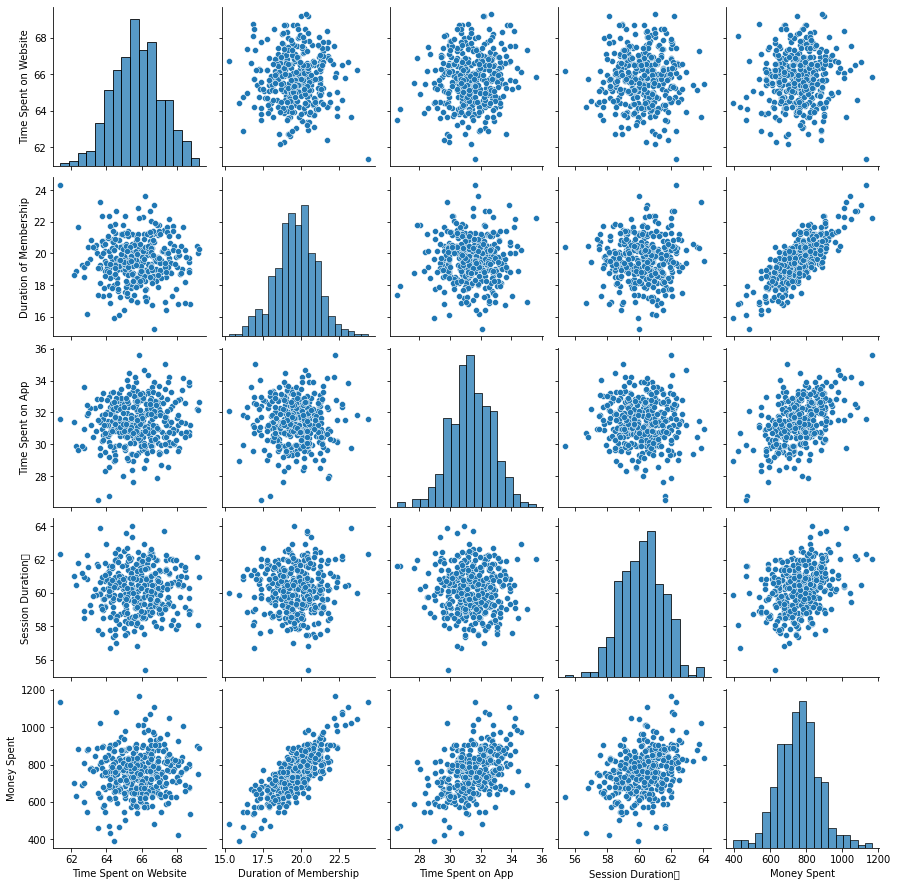

In [311]:
sns.pairplot(combined_df)

* We can clearly understand that there is correlation between the features and Money spent

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


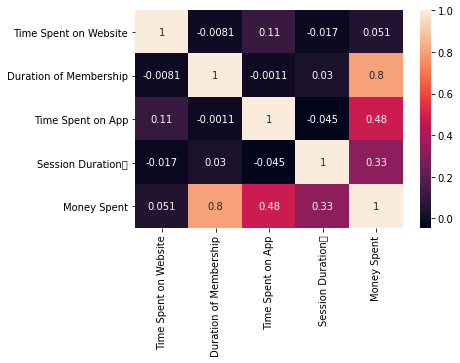

In [312]:
sns.heatmap(combined_df.corr(), annot=True)

* It is observed that time spent on website has no strong correlation with Money spent

In [354]:
train_X_df=train_X_df.drop(['Time Spent on Website'],axis=1)

In [355]:
train_X_df

,Duration of Membership,Time Spent on App,Session Duration\t
0,20.457356,32.219553,62.186251
1,19.787373,30.887689,57.816544
2,18.986008,32.711838,58.286399
3,19.474788,29.409797,62.118480
4,18.933956,32.462605,59.442156
...,...,...,...
369,18.797766,31.374397,60.997459
370,19.151099,31.890124,62.672003
371,18.278514,32.896052,59.292303
372,20.232239,32.636058,60.393138


In [356]:
train_Y_df=train_Y_dataframe

In [357]:
train_Y_df

,Money Spent
0,897.056602
1,708.029955
2,725.771404
3,723.439029
4,753.824173
...,...
369,760.045134
370,828.932592
371,718.459155
372,874.963118


## Training

In [358]:
from sklearn.model_selection import train_test_split
train_X_split, validation_X_split, train_Y_split, validation_Y_split =\
                                    train_test_split(train_X_df, train_Y_df, test_size=0.2,
                         shuffle=True, random_state=123)
print('Train X size', train_X_split.shape, '\nclass proportions\n', train_Y_split.value_counts())
print('\nValidation X size', validation_X_split.shape, '\nclass proportions\n', validation_Y_split.value_counts())

Train X size (299, 3) 
class proportions
 Money Spent
1166.959062    1
705.277728     1
706.608909     1
707.868193     1
708.029955     1
              ..
799.294581     1
800.820706     1
801.063394     1
805.602360     1
422.766999     1
Length: 299, dtype: int64

Validation X size (75, 3) 
class proportions
 Money Spent
1106.259917    1
677.402627     1
679.865522     1
680.910759     1
683.096219     1
              ..
820.786207     1
822.308899     1
828.932592     1
834.137134     1
393.510285     1
Length: 75, dtype: int64


In [359]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('selector', SelectKBest(k='all')),
                       ('estimator', LinearRegression())])

pipe.fit(train_X_split, train_Y_split)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('selector',
                 SelectKBest(k='all',
                             score_func=<function f_classif at 0x7fb6009d9e60>)),
                ('estimator',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [360]:
test_X_df=test_X_df.drop(['Time Spent on Website'],axis=1)

In [361]:
predicted_test_Y=pipe.predict(test_X_df)
#predicted_test_Y

In [362]:
predicted_validation_Y=pipe.predict(validation_X_split)
#predicted_validation_Y

In [363]:
predicted_validation_Y=pd.DataFrame(pd.Series(predicted_validation_Y.ravel()),columns=['Money Spent'])

In [364]:
predicted_validation_Y

,Money Spent
0,393.418340
1,821.302904
2,833.325206
3,811.714290
4,808.921941
...,...
70,917.310262
71,785.750096
72,777.871180
73,658.697875


In [365]:
validation_Y_split

,Money Spent
150,393.510285
355,834.979693
54,813.112704
102,816.223657
181,840.607319
...,...
280,886.960578
218,789.462006
309,768.520589
152,667.186245


In [366]:
from sklearn.metrics import mean_squared_error

In [367]:
mean_squared_error(predicted_validation_Y,validation_Y_split)

189.14389893010306

# Submission 
Writing the predicted values to CSV file

In [368]:
pd.DataFrame(predicted_test_Y).to_csv('predicted_test_Y_ec.csv', header=None, index=False)